# Passive Cell Tutorial

In [2]:
%matplotlib qt5
from neuron import h
from matplotlib import pyplot
%matplotlib inline
h.load_file('stdrun.hoc')

1.0

### 1) Create the cell and define its geometry 

#### NEURON defines it as a cylinder so we only need to give length and diameter



In [3]:
#Create the soma section and define the default parameters
soma = h.Section(name='soma')
soma.diam = 200 #default is micrometers
soma.L = 100 #um

### 2) Define the cell's biophysics

In [4]:
soma.cm = 1.4884e-4/6.2832e-4 #uF

#Insert the Hodgkin-Huxley channels and define the conductances
soma.insert('hh')
soma.gnabar_hh = 0.0
soma.gkbar_hh = 0.0
soma.gl_hh = 2.0e-5
soma.el_hh = -70

v_init = h.v_init= -60

### 3) Inject current

In [5]:
#Inject current in the middle of the soma
stim = h.IClamp(soma(0.5))
stim.delay = 100.0 #ms
stim.dur = 500.0 #ms
stim.amp = 1.0 #nA

### 4) Setup the simulation and look at the results!

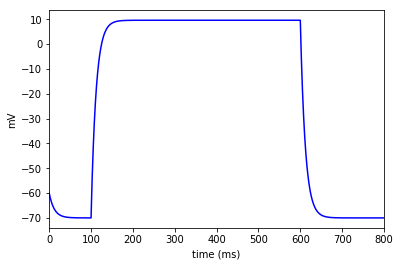

In [6]:
# We use this package for visualization
import matplotlib.pyplot as plt

tstop = h.tstop = 800   #ms
h.dt = 0.025

v0_vec = h.Vector()
t_vec = h.Vector()

v0_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.run()

plt.figure()
plt.plot(t_vec, v0_vec,'b')
plt.xlim(0, tstop)
plt.xlabel('time (ms)')
plt.ylabel('mV')

plt.show()